# 1. Basit Doğrusal Regresyon - Model

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [53]:
ad = pd.read_csv("Advertising.csv")
df = ad.copy()

In [54]:
df.head()  # veri setimiz indexi değişken olarak almış.

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [55]:
df = df.iloc[:, 1:len(df)]  # problemimizin üzerinden 'iloc' kullanarak geldik.

In [56]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [58]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [63]:
df.isnull().values.any()  # veri setinin içerisinde eksik gözlem varsa 'True' yoksa 'False' döner.

False

In [64]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [65]:
import seaborn as sns

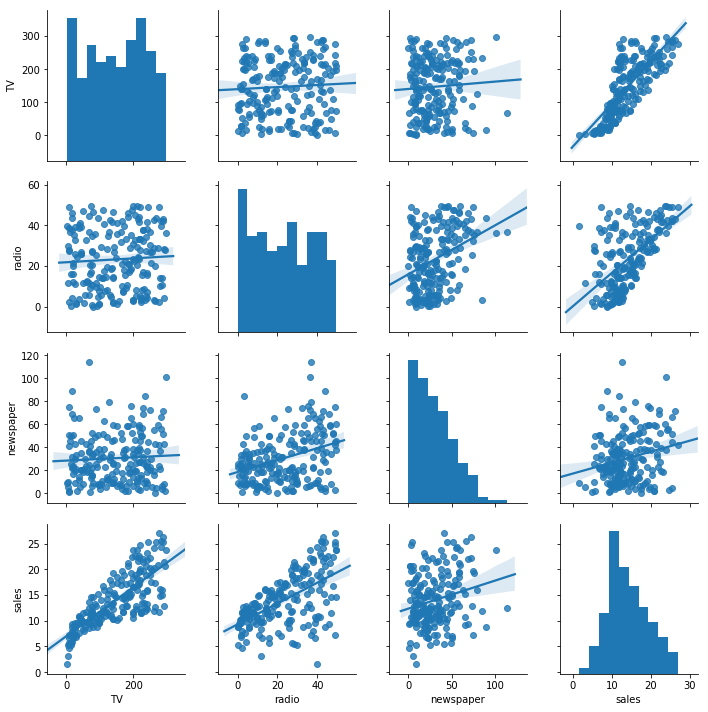

In [66]:
sns.pairplot(df, kind = "reg");

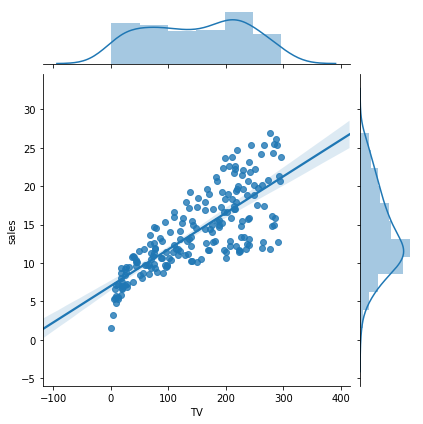

In [68]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

## Statsmodels ile modelleme

In [69]:
import statsmodels.api as sm

In [70]:
X = df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [71]:
X = sm.add_constant(X)

C:\Users\Sefa3\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [72]:
X.head()  # bağımsız değişkenimiz

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [73]:
y = df["sales"]  # bağımlı değişkenimiz
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [76]:
lm = sm.OLS(y, X)

In [77]:
model = lm.fit()

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           1.47e-42
Time:                        23:06:36   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
import statsmodels.formula.api as smf

In [80]:
lm2 = smf.ols("sales ~ TV", df)

In [81]:
model2 = lm2.fit()

In [82]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           1.47e-42
Time:                        23:06:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
model.params

const    7.032594
TV       0.047537
dtype: float64

In [84]:
model2.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [85]:
model.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Thu, 19 Sep 2019",Prob (F-statistic):,1.47e-42
Time:,23:06:40,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [86]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [87]:
model.conf_int() # güven aralıkları

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [88]:
model.f_pvalue

1.467389700194647e-42

In [89]:
print("f_pvalue:", "%.3f" % model.f_pvalue)

f_pvalue: 0.000


In [90]:
print("f_pvalue:", "%.4f" % model.f_pvalue)

f_pvalue: 0.0000


In [91]:
print("f_pvalue:", "%.15f" % model.f_pvalue)

f_pvalue: 0.000000000000000


In [92]:
print("f_pvalue:", "%.40f" % model.f_pvalue)

f_pvalue: 0.0000000000000000000000000000000000000000


In [93]:
print("f_pvalue:", "%.42f" % model.f_pvalue)

f_pvalue: 0.000000000000000000000000000000000000000001


In [94]:
print("f_pvalue:", "%.45f" % model.f_pvalue)

f_pvalue: 0.000000000000000000000000000000000000000001467


In [95]:
print("fvalue:", "%.4f" % model.fvalue)

fvalue: 312.1450


In [96]:
print("tvalue:", "%.2f" % model.tvalues[0:1])

tvalue: 15.36


In [97]:
model.mse_model

3314.618166868649

In [98]:
model.rsquared

0.611875050850071

In [99]:
model.rsquared_adj

0.6099148238341623

In [100]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [101]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [102]:
print("Sales = " + str("%.2f" % model.params[0]) + " + TV " + "*" + str(" %.2f" % model.params[1]))

Sales = 7.03 + TV * 0.05


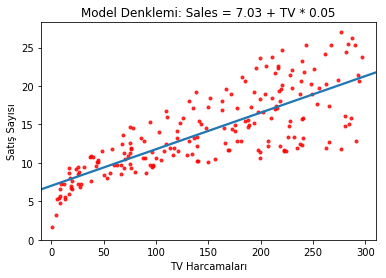

In [103]:
g = sns.regplot(df["TV"], df["sales"], ci = None, scatter_kws = {"color" : "r", "s" : 9})

g.set_title("Model Denklemi: Sales = 7.03 + TV * 0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")

plt.xlim(-10, 310)
plt.ylim(bottom = 0);

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_

7.032593549127693

In [106]:
model.coef_

array([0.04753664])

In [107]:
model.score(X, y)

0.611875050850071

In [108]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])